Import the libraries

In [1]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.cluster import KMeans

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Load the data

In [2]:
digits = datasets.load_digits()
print(digits.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

Take a look at the data

In [3]:
print(digits.data)

[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]


Take a look at the target values

In [4]:
print(digits.target)

[0 1 2 ... 8 9 8]


Visualize the image at index 100

<Figure size 432x288 with 0 Axes>

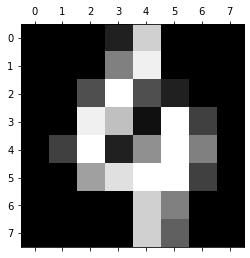

In [5]:
plt.gray() 

plt.matshow(digits.images[100])

plt.show()

Print the target of the image

In [6]:
print(digits.target[100])

4


Create a KMeans model

In [0]:
model = KMeans(n_clusters=10, random_state=42) # Since there are only 10 digits, the number of clusters will be 10

Fit the model to the data

In [8]:
model.fit(digits.data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=10, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

Visualize all of the centroids

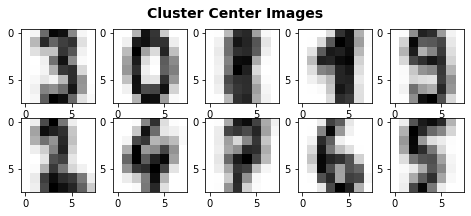

In [10]:
fig = plt.figure(figsize=(8, 3))
plt.suptitle('Cluster Center Images', fontsize=14, fontweight='bold')

# Create a for loop to display each of the cluster centers
for i in range(10):

  # Initialize subplots in a grid of 2X5, at i+1th position
  ax = fig.add_subplot(2, 5, 1 + i)

  # Display images
  ax.imshow(model.cluster_centers_[i].reshape((8, 8)), cmap=plt.cm.binary)

plt.show()

Create a list of new samples

In [0]:
new_samples = np.array([
[0.00,0.00,2.27,3.05,2.97,0.45,0.00,0.00,0.00,1.35,7.62,7.62,7.62,4.26,0.00,0.00,0.00,0.00,2.05,0.23,6.10,4.57,0.00,0.00,0.00,0.00,0.00,0.15,7.32,4.11,0.00,0.00,0.00,0.00,0.00,1.52,7.62,2.43,0.00,0.00,0.00,0.00,0.07,5.39,7.62,3.72,1.66,0.00,0.00,0.00,2.72,7.62,7.62,7.61,6.70,0.00,0.00,0.00,2.57,5.32,1.21,0.67,0.99,0.00],
[0.38,7.00,7.24,6.86,7.16,7.24,0.60,0.00,2.13,7.62,1.82,0.00,2.04,7.61,1.75,0.00,2.97,7.62,0.45,0.00,0.91,7.62,2.66,0.00,3.05,7.62,0.00,0.00,0.07,7.62,3.05,0.00,3.05,7.62,0.53,0.00,0.00,7.62,3.05,0.00,1.74,7.62,2.57,0.00,1.21,7.62,2.74,0.00,0.07,6.69,6.85,0.83,4.86,7.54,1.05,0.00,0.00,1.36,7.45,7.46,7.62,3.87,0.00,0.00],
[0.00,0.15,6.01,7.62,7.61,6.31,0.00,0.00,0.00,3.72,7.62,3.03,6.45,6.86,0.00,0.00,0.83,7.23,5.70,1.43,7.61,7.00,0.00,0.00,2.05,7.62,7.62,7.62,7.61,7.62,0.00,0.00,0.00,1.67,2.28,2.28,5.46,7.38,0.00,0.00,0.00,0.00,0.00,1.51,7.45,4.78,0.00,0.00,0.00,2.58,5.63,6.37,6.99,0.68,0.00,0.00,0.00,2.19,7.30,7.62,3.71,0.00,0.00,0.00],
[0.00,0.00,2.29,7.62,1.29,0.00,0.00,0.00,0.00,0.00,2.28,7.62,0.84,0.00,0.00,0.00,0.00,0.00,1.67,7.62,2.13,0.00,0.00,0.00,0.00,0.00,0.76,7.62,2.29,0.00,0.00,0.00,0.00,0.00,1.21,7.62,2.28,0.00,0.00,0.00,0.00,0.00,2.12,7.62,1.59,0.00,0.00,0.00,0.00,0.00,3.04,7.62,1.05,0.00,0.00,0.00,0.00,0.00,1.28,5.25,0.68,0.00,0.00,0.00]
])

Test the model and print out the predicted labels

In [15]:
new_labels = model.predict(new_samples)

print(new_labels) 

[5 0 9 7]


Map out each of the labels with the digit we think it represents

In [16]:
for i in range(len(new_labels)):
  if new_labels[i] == 0:
    print(0, end='')
  elif new_labels[i] == 1:
    print(9, end='')
  elif new_labels[i] == 2:
    print(2, end='')
  elif new_labels[i] == 3:
    print(1, end='')
  elif new_labels[i] == 4:
    print(6, end='')
  elif new_labels[i] == 5:
    print(8, end='')
  elif new_labels[i] == 6:
    print(4, end='')
  elif new_labels[i] == 7:
    print(5, end='')
  elif new_labels[i] == 8:
    print(7, end='')
  elif new_labels[i] == 9:
    print(3, end='')

8035